--- Training Fold 1 ---
Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.8716 - loss: 0.4155 - val_accuracy: 0.9811 - val_loss: 0.0669
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9579 - loss: 0.1448 - val_accuracy: 0.9834 - val_loss: 0.0565
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.9702 - loss: 0.1038 - val_accuracy: 0.9903 - val_loss: 0.0347
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9754 - loss: 0.0866 - val_accuracy: 0.9886 - val_loss: 0.0394
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.9793 - loss: 0.0731 - val_accuracy: 0.9896 - val_loss: 0.0397
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9804 - loss: 0.0690 - val_accuracy: 0.9911 - val_loss: 0.0338
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.9824 - loss: 0.0640 - val_accuracy: 0.9911 - val_loss: 0.0341
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 

C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL S

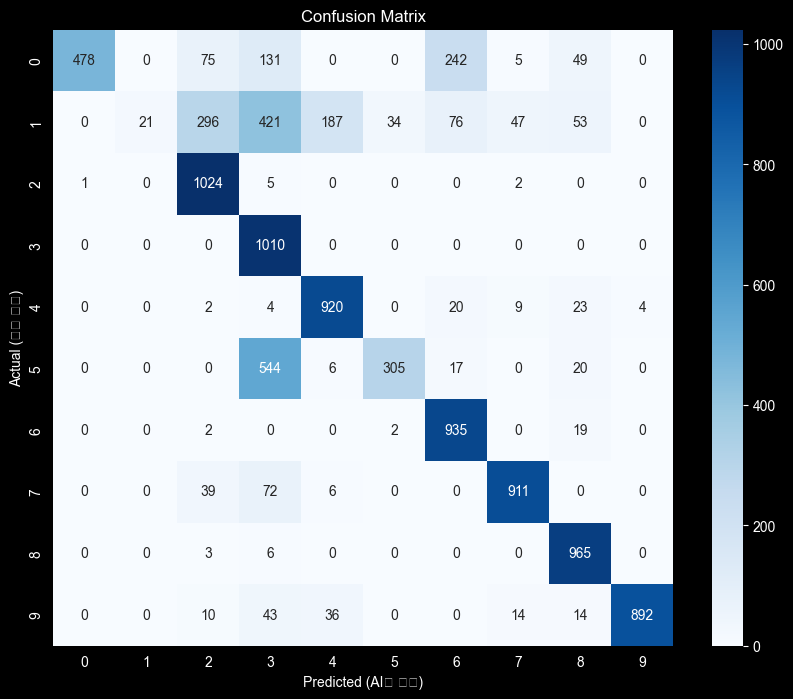

              precision    recall  f1-score   support

           0       1.00      0.49      0.66       980
           1       1.00      0.02      0.04      1135
           2       0.71      0.99      0.82      1032
           3       0.45      1.00      0.62      1010
           4       0.80      0.94      0.86       982
           5       0.89      0.34      0.49       892
           6       0.72      0.98      0.83       958
           7       0.92      0.89      0.90      1028
           8       0.84      0.99      0.91       974
           9       1.00      0.88      0.94      1009

    accuracy                           0.75     10000
   macro avg       0.83      0.75      0.71     10000
weighted avg       0.83      0.75      0.70     10000



In [19]:
# OpenCV 한테 숫자 줌 -> 그게 패스워드가됨 -> 그 패스워드가 맞는지 아닌지?
# import cv2 as cv
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 전처리
# 1단계: 공부할 데이터 준비(교과서 정리)
# 먼저 AI에게 줄 교과서(MNIST 숫자 데이터)를 가져와서 읽기 좋게 다듬기
# 데이터 합치기(concaternate): 원래 훈련용과 테스트용이 나눠져 있던 7만장의 사진을 하나로 다 합치기. 왜냐하면 나중에 'K-Fold' 라는 방식으로 더 엄격하게 시험을 치르기 위해
# 정규화(/255.0): 컴퓨터는 0~255 사이의 큰 숫자보다 0~1 사이의 소수점 숫자를 훨씬 계산하기 편해함. 그래서 모든 픽셀값을 255로 나눠줌 (파일 1,2 에서 배운 MinMaxScaler의 원리)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_all = np.concatenate((x_train, x_test))
y_all = np.concatenate((y_train, y_test))

# 정규화 (MinMaxScaler 원리)
x_all = x_all.astype('float32') / 255.0
x_all = x_all.reshape(-1, 28, 28, 1)

# 데이터 증강 (Data Augmentation) - 얇은 글씨, 회전 대응
# 2단계: 데이터 증강(상상력 키워주기)
# 원리: 똑바른 숫자 1만 보여주는게 아니라, 약간 회전시키고(10도), 크기도 조절(0.9~1.1배) 하고, 옆으로 살짝 밀어서 보여줌
# 이유: 이렇게 하면 사용자가 숫자를 아주 얇게 쓰거나 삐딱하게 써도 AI가 "아 이건 내가 공부할 때 봤던 1의 변형된 모습이네!" 라고 알아챌 수 있음. 이 덕분에 openCV로 억지로 글자를 두껍게 깎지 않아도 됨
datagen = ImageDataGenerator(
        rotation_range=15,      # 최대 15도까지 회전 (기울어진 숫자 대비)
        width_shift_range=0.1,  # 가로로 10% 이동
        height_shift_range=0.1, # 세로로 10% 이동
        zoom_range=0.2,         # 20%까지 확대/축소 (멀리 있거나 가까운 숫자 대비)
        # shear_range=0.1,      # 비틀기 (필요시 추가)
        fill_mode='constant',   # 빈 공간은 검은색(0)으로 채움
        cval=0
)

# 3단계: CNN 모델 설계(AI의 시각지능 만들기)
# Conv2D(합성곱): 이미지의 특징(엣지, 곡선)을 찾아내는 레이어. 숫자의 꺾임이나 직선을 감지
# MaxPooling: 특징만 남기고 사진 크기를 줄여서 중요한 정보만 압축
# Flatten: 2차원 사진 데이터를 AI가 이해할 수 있게 1줄로 길게 펼침
# Dropout(0.3): 공부할 때 뇌 세포의 30%를 무작위로 쉬게 함. 특정 모양에만 집착하는 '과적합(암기)' 를 방지하고 스스로 원리를 깨우치게 만듦(파일 6)
# Softmax: 마지막에 10개 숫자(0~9) 중 정답일 확률을 다 합쳐서 100%가 되게 계산해줌
def create_model():
    model = keras.Sequential([
        # 최신 케라스 권장 방식: Input 객체를 명시적으로 선언
        # Keras 3에서는 "첫 번째 레이어에 입력 크기를 쑤셔넣지 말고, Input 레이어를 따로 써서 입구입을 명시해라"
        layers.Input(shape=(28, 28, 1)),

        # 첫 번째 합성곱 블록 (필터 32개, 레이어 중첩)
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # 두 번째 합성곱 블록 (필터 64개로 확장 - 파라미터 증가)
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # 특징 추출 후 밀집층
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # 학습률 최적화
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

history_list = []

# K-Fold 교차 검증 (파일 5 기술)
# 4단계: K-Fold 교차 검증(엄격한 반복 시험)
# StratifiedKFold는 파일 5에서 강조된 "좋은 모델을 고르는 법"이다
# 방법: 전체 데이터를 5묶음으로 나눔. 4묶음으로 공부하고 1묶음으로 시험 보는 과정을 5번 반복
# 이유: 딱 한번 시험 봐서 우연히 성적이 잘 나온건지, 아니면 진짜 실력인지 확인하기 위해서이다. 이 과정을 거치면 어떤 상황에서도 잘 작동하는 "강력한 모델"이 만들어진다
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in skf.split(x_all, y_all):
    print(f'--- Training Fold {fold_no} ---')
    train_x, val_x = x_all[train_index], x_all[val_index]
    train_y, val_y = y_all[train_index], y_all[val_index]

    model = create_model()

    # 학습 실행 및 기록 저장
    history = model.fit(
        datagen.flow(train_x, train_y, batch_size=64),
        epochs=10, # 발표용은 5~10회 추천
        validation_data=(val_x, val_y),
        verbose=1 # verbose=0(침묵모드): 학습하는 동안 화면에 아무것도 안 나옴. verbose=1(진행바 모드): 진행 상황과 점수(정확도)가 실시간으로 출력됨
    )
    history_list.append(history)

    fold_no += 1
    if fold_no > 2: break # 시간 관계상 Z-Fold 까지만 예시로 진행

model.save("advanced_digit_cnn.keras")

# 테스트 데이터로 예측
# 성능 평가
# Confusion Matrix(오차 행렬): 가로-세로 표를 그려서 "AI가 1을 7로 헷갈려 하는지", "2를 3으로 헷갈려 하는지"를 한눈에 보여준다
# Precision(정밀도) & Recall(재현율)
# 정밀도: AI가 이건 1이야! 라고 했을 때 진짜 1일 확률
# 재현율: 실제 세상의 많은 1 중에서 AI가 몇개나 놓치지 않고 찾아냈는지의 비율
y_pred = np.argmax(model.predict(x_test.reshape(-1, 28, 28, 1)), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted (AI의 예측)')
plt.ylabel('Actual (실제 정답)')
plt.title('Confusion Matrix')
plt.show()

# 정밀도(percision)와 재현율(recall)
# precision: AI가 "이건 1이야" 라고 말한 것 중 진짜 1인 비율
# recall: 실제 숫자 1들을 AI가 얼마나 놓치지 않고 찾아냈는가 하는 비율
print(classification_report(y_test, y_pred)) # Precision, Recall 출력

# OpenCV 침식/팽창은 원본 데이터를 강제로 변형시키지만, 저는 ImageDataGenerator를 통한 데이터 증강(Data Augmentation) 기법을 사용했습니다. 학습 과정에서 0.9배에서 1.1배까지 실시간으로 크기를 조절(Zoom)하며 학습시켰기 때문에, 모델은 선이 얇은 글씨와 굵은 글씨 모두를 '숫자의 특징'으로 학습하여 OpenCV 전처리 없이도 높은 일반화 성능을 가집니다.

In [4]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# [공통 모듈] OpenCV 전처리 함수
def preprocess_digit(roi_img):
    # 1. ROI 의 가장자리 5픽셀을 잘라내기 (Border 제거)
    offset = 5
    roi_clean = roi_img[offset:-offset, offset:-offset]

    # 2. 그레이스케일 변환 및 대비 향상
    gray_image = cv2.cvtColor(roi_clean, cv2.COLOR_BGR2GRAY) # 이진화 하기 위해
    gray_image = np.flip(gray_image, 1)
    cv2.imshow("gray_image", gray_image)

    # clipLimit: 대비 제한 임계값(보통 2.0), tileGridSize: 타일 크기(보통 8*8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_gray = clahe.apply(gray_image)
    cv2.imshow("Clahe", enhanced_gray)

    # 전처리를 꼼꼼하게 했다?
    # 카메라로 숫자를 찍으면 조명 때문에 어둡게 나오기도 하고, 종이에 잡티가 있을 수도 있다. 이런 걸 그대로 주면 AI는 "잡티도 숫자의 일부인가?" 라고 착각한다.
    # 노이즈 제거(Blur): 지저분한 점들을 지워서 깨끗하게 만든다
    # 임계값 처리(Threshold): 어설픈 회색을 다 날리고 확실한 검정과 흰색으로 바꾼다
    # 침식/팽창(Erosion/Dilation): 사용자가 펜으로 숫자를 너무 얇게 썼다면, AI가 공부한 '통통한 숫자'들과 비슷해지도록 글씨 두께를 인위적으로 조절한다
    # 가우시안 블러가 5를 덜 끊어지게 함
    blur = cv2.GaussianBlur(enhanced_gray, (5, 5), 3) # 노이즈 제거
    # 블러 강도를 세게 주면 글자 테두리가 너무 뭉개져서 나중에 1과 2가 서로 달라붙을 수 있음
    # blur = cv2.medianBlur(gray_image, 5) # 빛 반사 잡음 제거를 위해 미디언 블러 사용 (필터 크기 5)
    # blur = cv2.bilateralFilter(gray_image, 9, 75, 75) # 9: 필터 크기, 75: 색 공간 표준편차, 75: 좌표 공간 표준편차
    cv2.imshow("blur", blur)
    # gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # 핵심: 적응형 이진화(adaptive thresholding)
    # 얇은 글자를 선명하게 살려냄
    # INV 를 써서 처음부터 배경을 검정색으로 만들기
    # 블록 사이즈를 11에서 21로 키워 큼직하게 잡기
    binary = cv2.adaptiveThreshold(blur,
                                       255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 21, 5) # C 값을 7에서 5로 낮춰 더 민감하게 잡음

    cv2.imshow("binary1", binary)
    kernel = np.ones((5, 5), np.uint8)
    # closed_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    # processed_img = cv2.dilate(closed_img, kernel, iterations=2)
    processed_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=3) # 다시 한번 깎기
    return processed_img

C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [5]:
def extract_digits(processed_img, num_digits=4, debug=False):
    """
    이진화된 이미지에서 숫자 영역을 찾아내어 28*28 이미지 리스트로 반환
    """
    # 1. 외곽선 찾기
    contours, _ = cv2.findContours(processed_img.copy(),
                                   cv2.RETR_EXTERNAL, # RETR_LIST 사용시 6 검출할 때 0 도 같이 검출됨
                                   cv2.CHAIN_APPROX_SIMPLE
                                   )

    # 디버그 모드 시 시각화용 복사본 생성 (원본 보존)
    if debug:
        contour_view = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2BGR)
        # 검출된 모든 외곽선을 초록색으로 그램
        cv2.drawContours(contour_view, contours, -1, (0, 255, 0), 2)

    roi_h, roi_w = processed_img.shape
    roi_area = roi_h * roi_w
    digit_rects = []

    # 2. 숫자 후보 필터링
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        area = cv2.contourArea(cnt)
        print("x, y, w, h : ", x, y, w, h)
        print("area : ", area)

        # 필터링 조건 1: 너무 큰 덩어리 제거 (테두리 등)
        if area > (roi_area * 0.95): continue
        #필터링 조건 2: 너무 작은 잡음 제거
        if area < 300: continue
        # 필터링 조건 3: 경계면에 닿은 덩어리 제거 (마진 설정)
        margin = 5 # 초기에 15로 잡았는데, 손글씨가 화면에 꽉 찰 경우 이를 삭제해버림

        is_margin = x < margin or y < margin or (x+w) > (roi_w - margin) or (y+h)  > (roi_h-margin)
        print("is_margin : ", is_margin)
        if is_margin: continue

        # 종횡비나 채우기 비율 등 추가 조건이 필요하면 여기에 작성
        digit_rects.append((x, y, w, h))

    # 3. 면적 순으로 정렬 후 상위 4개 선택 (비밀번호 4자리 기준)
    digit_rects = sorted(digit_rects, key=lambda r: r[2]*r[3], reverse=True)[:num_digits]

    # 4. 왼쪽에서 오른쪽 순서로 다시 정렬 (비밀번호 순서)
    digit_rects.sort(key=lambda r: r[0])

    digit_images = []
    padding = 15

    # 5. 각 영역 크롭 및 리사이즈
    for i, (x, y, w, h) in enumerate(digit_rects):
        if debug:
            cv2.rectangle(contour_view, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(contour_view, str(i), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        x1, y1 = max(0, x-padding), max(0, y-padding)
        x2, y2 = min(roi_w, x+w+padding), min(roi_h, y+h+padding)

        # 슬라이싱
        digit_crop = processed_img[y1:y2, x1:x2]

        # 28 * 28 로 리사이즈
        resized_img = cv2.resize(digit_crop, (28, 28), interpolation=cv2.INTER_AREA)
        digit_images.append(resized_img)

        if debug:
            cv2.rectangle(contour_view, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.imshow(f"Debug_Crop_{i}", resized_img)

    if debug:
        cv2.imshow("Debug_Contours_and_Boxes", contour_view)
    return digit_images, digit_rects

In [7]:
import cv2
import numpy as np
import os
from datetime import datetime

def capture_user_dataset():
    cap = cv2.VideoCapture(0)
    base_path = "dataset"

    # 0~9까지 폴더 생성
    for i in range(10):
        os.makedirs(f"{base_path}/{i}", exist_ok=True)

    print("수집 시작: 숫자 키 (0~9)를 누르면 저장, 'esc'종료")

    while True:
        ret, frame = cap.read()
        if not ret: break
        frame = cv2.flip(frame, 1)
        h, w, _ = frame.shape

        # ROI 영역 표시 (중앙 300*300)
        size = 300
        x1, y1 = (w-size)//2, (h-size)//2
        roi = frame[y1:y1+size, x1:x1+size]

        cv2.rectangle(frame, (x1, y1), (x1+size, y1+size), (0, 255, 0), 2)
        cv2.imshow("Capture (Press 0-9 to Save)", frame)

        key = cv2.waitKey(1) & 0xFF
        if ord('0') <= key <= ord('9'):
            digit = chr(key)
            print("digit : ", digit)

            # 1. 전처리 수행 (이진화 등)
            processed = preprocess_digit(roi)

            # 2. 숫자 추출
            # 수집 시에는 숫자를 하나씩 쓴다고 가정하고,가장 적절한 하나만 저장하거나 추출한다
            digit_images, rects = extract_digits(processed, num_digits=1, debug=True)

            if digit_images:
# 데이터 수집용이므로 가장 확실한 첫 번째 이미지만 저장
                d_img = digit_images[0]

                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S_%f")
                filename = f"{digit}_{timestamp}.png"
                img_path = os.path.join(base_path, digit, filename)

                cv2.imwrite(img_path, d_img)
                print(f"[{digit}] 저장됨: {img_path}")
                cv2.imshow("Saved Digit", d_img)
            else:
                print("숫자가 검출되지 않았습니다. 여백이나 크기를 조절해 보세요.")

        elif key == 27:
            break

    cap.release()
    cv2.destroyAllWindows()
capture_user_dataset()

수집 시작: 숫자 키 (0~9)를 누르면 저장, 'esc'종료
digit :  8
x, y, w, h :  93 102 104 150
area :  6961.5
is_margin :  False
x, y, w, h :  226 48 64 24
area :  936.5
is_margin :  True
x, y, w, h :  50 31 2 2
area :  0.5
x, y, w, h :  0 0 21 31
area :  286.5
[8] 저장됨: dataset\8\8_20260115_142133_211868.png
digit :  8
x, y, w, h :  104 17 93 263
area :  2134.0
is_margin :  False
[8] 저장됨: dataset\8\8_20260115_142218_573669.png
digit :  8
x, y, w, h :  110 78 128 193
area :  10931.0
is_margin :  False
[8] 저장됨: dataset\8\8_20260115_142305_298310.png
digit :  8
x, y, w, h :  58 101 196 116
area :  10258.5
is_margin :  False
x, y, w, h :  96 0 36 23
area :  380.5
is_margin :  True
[8] 저장됨: dataset\8\8_20260115_142332_964649.png


KeyboardInterrupt: 

In [1]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("웹캠을 열 수 없습니다")
    exit()

while True:
    ret, frame = cap.read() # ret은 true와 false를 담음
    if not ret:
        print("프레임을 가져올 수 없습니다")
        break
    flip_frame = cv2.flip(frame, 1)
    height, width, _ = frame.shape # _는 color가 넘어옴
    center_x, center_y = width // 2, height // 2 # 프레임의 가운데가 찍힘
    roi = flip_frame[center_y - 150:center_y + 150, center_x - 150:center_x + 150]
    cv2.rectangle(flip_frame,
                  (center_x - 150, center_y - 150),
                  (center_x + 150, center_y + 150),
                  (0, 0, 255),
                  2)
    cv2.imshow("Webcam", flip_frame)

    # 화면 캡처를 위한 키 값 받기
    key = cv2.waitKey(1) & 0xFF
    if key == ord('c' or 'C'):
        gray_image = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) # 이진화 하기 위해
        gray_image = np.flip(gray_image, 1)
        cv2.imwrite("gray_image.png", gray_image)

        gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 3) # 노이즈 제거
        _, otsu_thread = cv2.threshold(gaussian_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# 이진화
        cv2.imshow("otsu_thread", otsu_thread) # 딱 숫자만 나오게 해야함 (손이 나올수도 있고.. 글자를 진하게 만들어야함), 영상 축소?, 전처리 해줘야함

        ### morph
        kernal = np.ones((5, 5), np.uint8)
        erosion = cv2.erode(otsu_thread, kernal, iterations=5) # 글자가 두꺼워짐 - 배경이 흰색, 물체가 검은색이므로 침식을 해야함. 따라서 검은색이 퍼져나감
        cv2.imshow("erosion", erosion)
        cv2.imwrite("digit_binary_image.png", erosion)

        img = cv2.imread("digit_binary_image.png", cv2.IMREAD_UNCHANGED)
        h, w = img.shape[:2]
        crop_size = 280 # 300 바이 300 에서 20 픽셀정도를 날려버림
        cx, cy = w // 2, h // 2 # 센터
        half = crop_size // 2
        x1, x2 = cx - half, cx + half
        y1, y2 = cy - half, cy + half

        # 경계면 설정
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(w, x2)
        y2 = min(h, y2)

        cropped_img = img[y1:y2, x1:x2]
        cv2.imshow("cropped_image", cropped_img)

        # 이미지 반전
        reversed_img = cv2.bitwise_not(cropped_img)
        cv2.imshow("reversed_image", reversed_img)
        cv2.imwrite("IMAGE_FOR_TEST.png", reversed_img)

        # 이미지 축소를 해주어야한다 (학습된 이미지는 28*28)
        # 네번 캡쳐해서 학습된 모델 가지고 4번 보여주거나 이미지 저장된걸 보여줘가지고 비번 맞추기?
        # 손으로 터치를 하던가 해야하는데 그럴 수 없어서 이미지로 하는것?
        # 키오스크로 하면 될듯
        # 4개 이미지 입력받아서 뭔가 실행되는걸 하는것
        # 동영상과 찍는것 하기
        # 마치고 찰칵, 마치고 찰칵 -> 어서오세요! 같은 액션
        # 여기에 이미지 프로세싱이랑 머신러닝 들어감
        # 학습을 위해 이미지 조작해보고, dataset 조작
        # 어떻게 필터를 구현했고 (내가 어떻게 필터를 구현했고)
        # 내가 히든레이어 얼마나 썼고, 정확도 몇퍼센트고, OpenCV 라이브러리 사용해서 숫자가 얇으니까 두껍게 전처리해서 필터링까지 해서 던졌다 이런걸 PPT에 나타내기


    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_custom_model():
    # 1. 데이터 로드 및 전처리 (파일 1, 2의 Scaler 원리 적용)
    base_path = "dataset"
    user_images = []
    user_labels = []

    if os.path.exists(base_path):
        print("사용자 데이터를 불러오는중...")
        for digit in range(10):
            dir_path = os.path.join(base_path, str(digit))
            if not os.path.exists(dir_path): continue

            for img_name in os.listdir(dir_path):
                print("img_name is ", img_name)
                img_path = os.path.join(dir_path, img_name)

                # 이미지가 28*28 흑백으로 저장되어 있다고 가정
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (28, 28)) # 크기 동일
                    user_images.append(img)
                    user_labels.append(digit)
        print(f"사용자 데이터 {len(user_images)}개 로드 완료")

    # MNIST 데이터 로드
    (x_mnist, y_mnist), (x_test, y_test) = keras.datasets.mnist.load_data()

    # 3. 데이터 합치기 (사용자 데이터가 있을 경우)
    if len(user_images) > 0:
        x_all = np.concaternate((x_mnist, np.array(user_images)), axis=0)
        y_all = np.concaternate((y_mnist, np.array(user_labels)), axis=0)
    else:
        x_all, y_all = x_mnist, y_mnist

    # 2. Scaler 적용 (Essential)
    # 이미지 데이터는 0~255 사이이므로 255로 나누어 0~1 사이로 정규화 한다.
    x_all = x_all.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # CNN 입력을 위한 차원 변경 (샘플수, 가로, 세로, 채널)
    x_all = x_all.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    # 3. K-Fold 교차 검증 및 최적화 (파일 5 기술)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_no = 1

    # 데이터 증강 (상상력 키워주기)
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        fill_mode='constant',
        cval=0
    )

    for train_index, val_index in skf.split(x_all, y_all):
        print(f'--- Training Fold {fold_no} ---')
        train_x, val_x = x_all[train_index], x_all[val_index]
        train_y, val_y = y_all[train_index], y_all[val_index]

        # 4. 모델 설계 (파일 6, 7의 신경망 구조)
        model = keras.Sequential([
            layers.Input(shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.5), # 과적합 방지 (파일 6)
            layers.Dense(10, activation='softmax')
        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        model.fit(
            datagen.flow(train_x, train_y, batch_size=64),
            epochs=5,
            validation_data=(val_x, val_y),
            verbose=1
        )

        fold_no += 1
        if fold_no > 2: break # 시간 관계상 2-Fold 까지만 진행


    # 6. 모델 저장
    model.save("my_digit_model.keras")
    print("모델 저장 완료: my_digit_model.keras")

    # 7. 성능 평가 (파일 5 기술: Confusion Matrix, Precision, Recall)
    y_pred = np.argmax(model.predict(x_test), axis=1)

    # 오차 행렬 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - my_digit_model')
    plt.show()

    # 정밀도, 재현율 출력
    print("\n[성능 평가 보고서]")
    print(classification_report(y_test, y_pred))

    return model

# 학습 실행
trained_model = train_custom_model()

In [2]:
# 실시간 비밀번호 입력 시스템
def run_doorlock():
    model = keras.models.load_model("my_digit_model.keras")
    password = [1,2,3,4]
    input_queue = []
    status = "READY"
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret: break
        frame = cv2.flip(frame, 1)
        h, w, _ = frame.shape
        size = 300
        x1, y1 = (w-size)//2, (h-size)//2
        roi = frame[y1:y1+size, x1:x1+size]

        cv2.rectangle(frame, (x1, y1), (x1+size, y1+size), (255, 0, 0), 2)
        cv2.putText(frame, f"Pass: {input_queue}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame, f"STATUS: {status}", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        cv2.imshow("Smart Doorlock (Press 'C' to Enter)", frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            processed = preprocess_digit(roi)
            input_data = (processed / 255.0).reshape(1, 28, 28, 1)

            # 예측
            pred = model.predict(input_data)
            digit = np.argmax(pred)
            input_queue.append(int(digit))
            print(f"Captured: {digit}")

            if len(input_queue) == 4:
                if input_queue == password:
                    status = "WELCOME OPEN"
                    print("비밀번호 일치")
                else:
                    status = "WRONG RESET"
                    print("비밀번호 불일치")
                cv2.waitKey(2000)
                input_queue = []
        elif key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [20]:
# OpenCV 한테 숫자 줌 -> 그게 패스워드가됨 -> 그 패스워드가 맞는지 아닌지?
# import cv2 as cv
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

model = keras.models.load_model("advanced_digit_cnn.keras")

print(model.summary())

password = [1,2,3,4]
input_digits = []
status_message = "Capture 4 digits (Press 'C')"

cap = cv2.VideoCapture(0)
# 해상도 높이기
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
if not cap.isOpened():
    print("웹캡을 열 수 없습니다")
    exit()

while True:
    ret, frame = cap.read() # ret은 true와 false를 담음
    if not ret:
        print("프레임을 가져올 수 없습니다")
        break

    flip_frame = cv2.flip(frame, 1)
    height, width, _ = frame.shape # _는 color가 넘어옴
    center_x, center_y = width // 2, height // 2 # 프레임의 가운데가 찍힘

    # ROI 설정 (300*300)
    roi_size = 300
    roi_half = roi_size // 2
    roi = flip_frame[center_y - roi_half:center_y + roi_half, center_x - roi_half:center_x + roi_half]

    cv2.rectangle(flip_frame,
                  (center_x - roi_half, center_y - roi_half),
                  (center_x + roi_half, center_y + roi_half),
                  (0, 0, 255),
                  2)

    cv2.putText(flip_frame, f"Input: {input_digits}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    cv2.putText(flip_frame, status_message, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

    cv2.imshow("Webcam", flip_frame)

    # 화면 캡처를 위한 키 값 받기
    key = cv2.waitKey(1) & 0xFF

    if key == ord('c') or key == ord('C'):
        # 흑백이어야 하는 이유
        # AI 입장에서는 어디가 바탕이고, 어디가 글씨인가만 알면 된다
        # 색상 정보가 섞여있으면 AI는 이건 빨간색이라 3인가? 파란색이라 8인가? 라고 헷갈려 할 수 있다.
        # 그래서 색을 다 빼버리고(grayScale) 더 나아가 바탕은 검정, 글씨는 하양(이진화)로 극명하게 대비를 시켜주는 것이다
        # 1. 전처리 시작 (회색조 -> 블러)
        processed_img = preprocess_digit(roi)
        cv2.imshow("Debug_Processed", processed_img)

        # 숫자가 2개 붙어있으면 두 숫자가 만나 한 덩어리가 되어버릴 수 있다
        # erode_img = cv2.erode(otsu_thread, kernal, iterations=5)
        # erosion = cv2.erode(otsu_thread, kernal, iterations=5) # 글자가 두꺼워짐 - 배경이 흰색, 물체가 검은색이므로 침식을 해야함. 따라서 검은색이 퍼져나감
        # erode_img = cv2.morphologyEx(otsu_thread, cv2.MORPH_OPEN, kernel, iterations=3)
        # cv2.imshow("erode_img", erode_img)

        digit_images, rects = extract_digits(processed_img, debug=True)
        print("digit_images : ", digit_images)
        print("rects : ", rects)
        detected_numbers = []

        for i, img in enumerate(digit_images):
            # 정규화 및 차원 확장
            input_data = (img / 255.0).reshape(1, 28, 28, 1) # CNN 입력 규격

            prediction = model.predict(input_data, verbose=0)
            digit = np.argmax(prediction)
            detected_numbers.append(int(digit))
            cv2.imshow(f"Final_To_AI_{i}", img) # AI에게 들어가는 최종 모습 확인

            print(f"인식된 개별 숫자: {digit}, 확률: {prediction[0][digit]*100:.2f}%")

        print(f"최종 인식된 숫자들: {detected_numbers}")

        for d in detected_numbers:
            if len(input_digits) < 4:
                input_digits.append(d)

        if len(input_digits) == 4:
            # 맞으면 성공, 틀리면 실패 메시지를 띄운다
            if input_digits == password:
                status_message = "SUCCESS! Welcome!"
            else:
                status_message = "WRONG PASSWORD! Resetting..."

            print(f"Final Input: {input_digits}, Result: {status_message}")
            input_digits = []

        # 이미지 축소를 해주어야한다 (학습된 이미지는 28*28)
        # 네번 캡쳐해서 학습된 모델 가지고 4번 보여주거나 이미지 저장된걸 보여줘가지고 비번 맞추기?
        # 손으로 터치를 하던가 해야하는데 그럴 수 없어서 이미지로 하는것?
        # 키오스크로 하면 될듯
        # 4개 이미지 입력받아서 뭔가 실행되는걸 하는것
        # 동영상과 찍는것 하기
        # 마치고 찰칵, 마치고 찰칵 -> 어서오세요! 같은 액션
        # 여기에 이미지 프로세싱이랑 머신러닝 들어감
        # 학습을 위해 이미지 조작해보고, dataset 조작
        # 어떻게 필터를 구현했고 (내가 어떻게 필터를 구현했고)
        # 내가 히든레이어 얼마나 썼고, 정확도 몇퍼센트고, OpenCV 라이브러리 사용해서 숫자가 얇으니까 두껍게 전처리해서 필터링까지 해서 던졌다 이런걸 PPT에 나타내기
    elif key == 27:
        break
    #
    # if cv2.waitKey(1) == 27:
    #     break

cap.release()
cv2.destroyAllWindows()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,612,672 (9.97 MB)

 Trainable params: 870,826 (3.32 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 1,741,654 (6.64 MB)

None
x, y, w, h :  106 94 93 154
area :  1391.5
is_margin :  False
x, y, w, h :  190 69 6 2
area :  2.5
x, y, w, h :  0 0 13 181
area :  814.0
is_margin :  True
digit_images :  [array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  55,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  62, 205,  54,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  61, 227,  46,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  56, 231,  53,   0,   0,   0,   0,
          0,   0